In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# <u>Importing customers_df

In [2]:
customers_df = pd.read_csv('customers_df')

In [3]:
customers_df.head()

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,gender_id,ia_id,banking_relationship,gender,investment_advisor,income_band,age_band,debt_to_income_ratio,tenure_years,total_borrowing
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1,1,Retail,Male,Victor Dean,Low,18-29,10.303506,2.657534,776727.46
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,1,2,Institutional,Male,Jeremy Porter,Mid,18-29,4.391724,20.071233,1272872.31
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,2,3,Private Bank,Female,Ernest Knight,Mid,18-29,6.221692,11.939726,1057284.58
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1,4,Commercial,Male,Eric Shaw,High,30-44,0.351450,2.764384,125400.06
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,2,5,Retail,Female,Kevin Kim,Mid,45-59,8.048871,9.454795,1052081.44


In [4]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   client_id                 3000 non-null   object 
 1   name                      3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   location_id               3000 non-null   int64  
 4   joined_bank               3000 non-null   object 
 5   banking_contact           3000 non-null   object 
 6   nationality               3000 non-null   object 
 7   occupation                3000 non-null   object 
 8   fee_structure             3000 non-null   object 
 9   loyalty_classification    3000 non-null   object 
 10  estimated_income          3000 non-null   float64
 11  superannuation_savings    3000 non-null   float64
 12  amount_of_credit_cards    3000 non-null   int64  
 13  credit_card_balance       3000 non-null   float64
 14  bank_loa

---

### 9) How does customers’ liquidity buffer (total cash available) relate to their credit exposure (total borrowing) across income bands and age bands — and does loyalty class change that relationship?

In [5]:
# create total deposits (liquidity buffer)

customers_df['total_deposits'] = customers_df[['bank_deposits','saving_accounts','checking_accounts']].sum(axis = 1)

In [6]:
# Optional
# log-transform to reduce skew (using np.log1p)
# doing ln(1 + x)

#customers_df['log_total_deposits'] = np.log1p(customers_df['total_deposits'])
#customers_df['log_total_borrowing'] = np.log1p(customers_df['total_borrowing'])

In [7]:
# check

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   client_id                 3000 non-null   object 
 1   name                      3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   location_id               3000 non-null   int64  
 4   joined_bank               3000 non-null   object 
 5   banking_contact           3000 non-null   object 
 6   nationality               3000 non-null   object 
 7   occupation                3000 non-null   object 
 8   fee_structure             3000 non-null   object 
 9   loyalty_classification    3000 non-null   object 
 10  estimated_income          3000 non-null   float64
 11  superannuation_savings    3000 non-null   float64
 12  amount_of_credit_cards    3000 non-null   int64  
 13  credit_card_balance       3000 non-null   float64
 14  bank_loa

In [8]:
customers_df['age_band'].unique()

array(['18-29', '30-44', '45-59', '60+', nan], dtype=object)

In [9]:
customers_df['income_band'].unique()

array(['Low', 'Mid', 'High'], dtype=object)

In [10]:
customers_df['loyalty_classification'].unique()

array(['Jade', 'Gold', 'Silver', 'Platinum'], dtype=object)

Text(0.5, 1.02, 'Liquidity Buffer vs Credit Exposure across Age, Income, and Loyalty Classes')

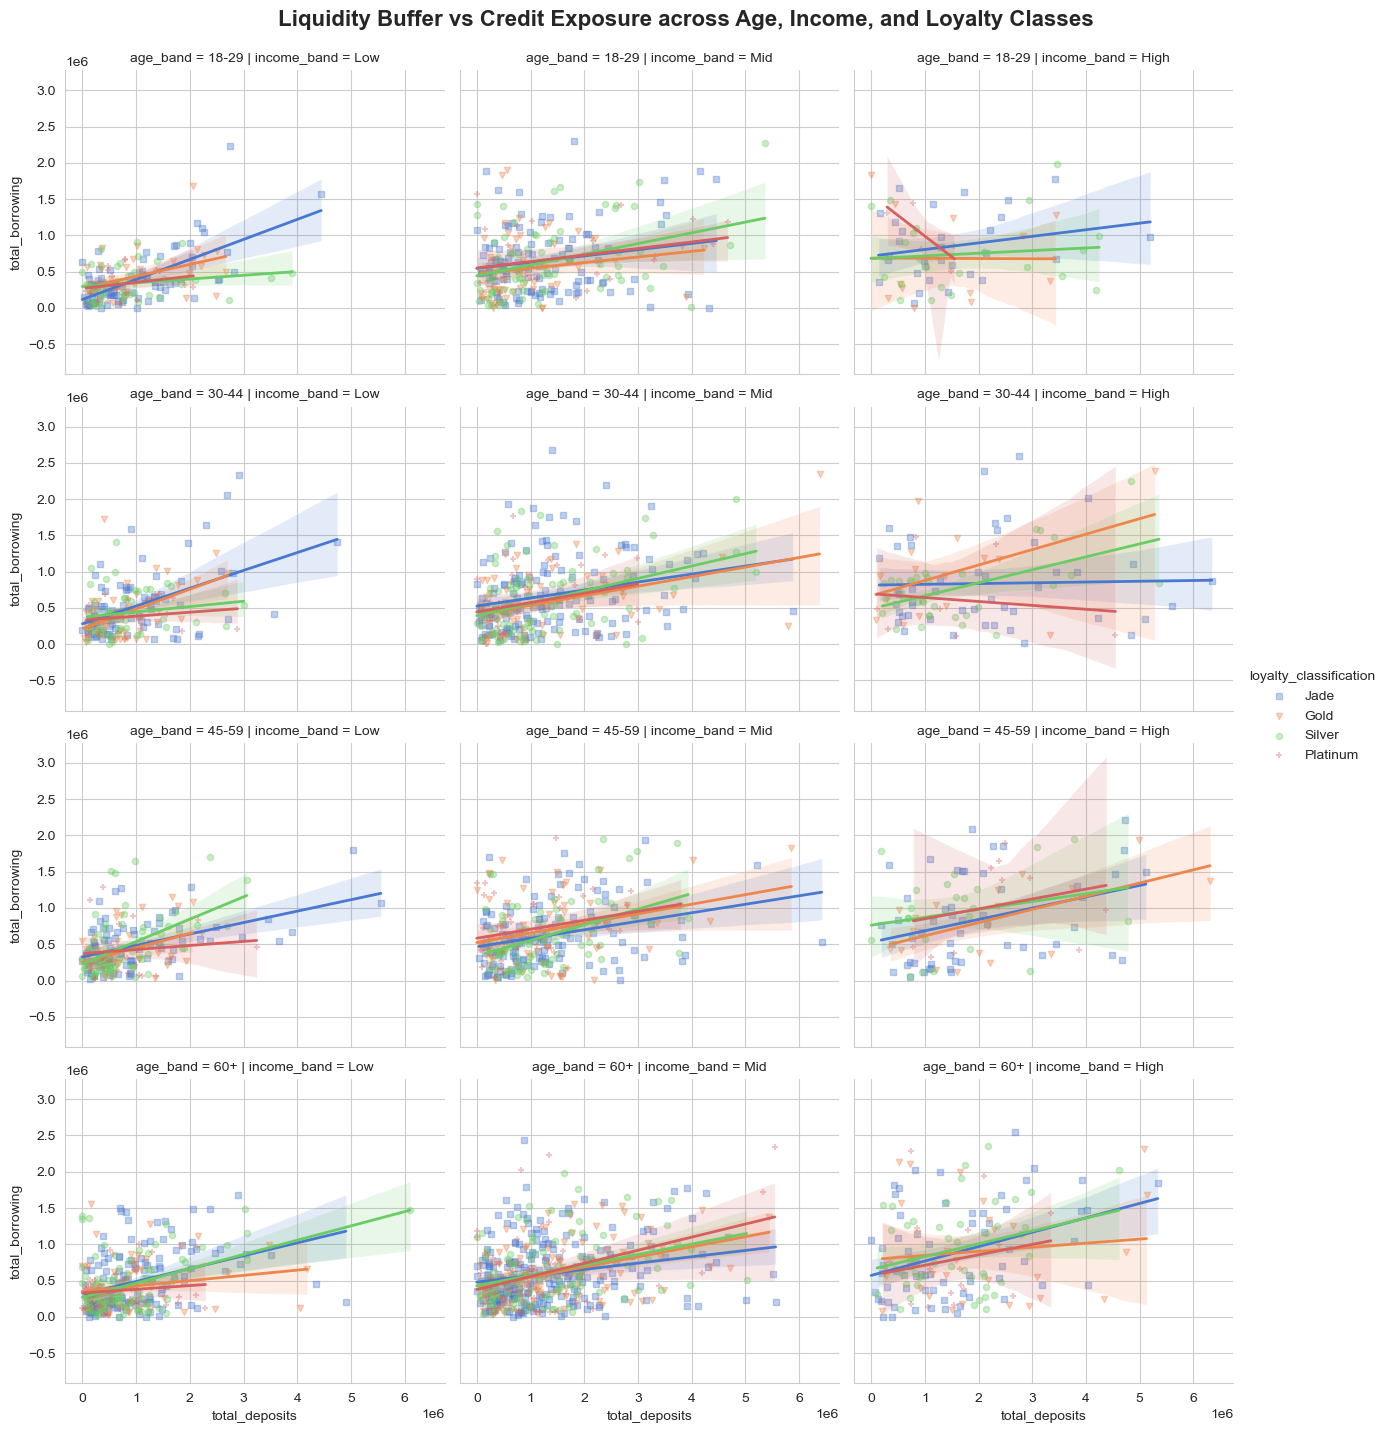

In [11]:
sns.set_style('whitegrid')

g = sns.lmplot(
    x = 'total_deposits',
    y = 'total_borrowing',
    data = customers_df,
    hue = 'loyalty_classification',
    row = 'age_band',
    col = 'income_band',
    palette = 'muted',
    markers = ['s', 'v', 'o', '+'],
    scatter_kws = {'alpha': 0.35, 's': 20},
    line_kws = {'linewidth': 2},
    height = 3.5,
    aspect = 1.2,
)

g.fig.suptitle("Liquidity Buffer vs Credit Exposure across Age, Income, and Loyalty Classes",
               fontsize = 16, fontweight = 'bold', y = 1.02)

- ***Key insights:***

    - Deposits and borrowing generally rise together across cohorts - customers borrow more as their liquidity grows (affordability-driven borrowing).
    - Exceptions: Platinum customers in 18–29 and 30–44 (High) show a negative relationship - they hold higher deposits but borrow less (deleveraging or low credit appetite).
    - Loyalty patterns: Jade dominates more cohorts than the rest - typically high in deposits and borrowing - except in 30–44 (High) where Jade shows high deposits but markedly lower borrowing, Jade is follwed by Gold then Silver, and Platinum is concentrated in 60+ (Mid).
    - Jade concentration drives credit exposure growth alongside deposits—tighten utilization limits and monitor this segment closely.

### 10) A clustered correlation heatmap comparing credit-exposure metrics (credit_card_balance, bank_loans, business_lending), liquidity indicators (bank_deposits, checking_accounts, saving_accounts, foreign_currency_account), and client characteristics (estimated_income, age, superannuation_savings, propertiess_owned).

***Which feature clusters emerge, which pairs show the strongest positive or negative correlations, and what do those patterns imply about customer credit-risk profiles (for example: high-credit/low-liquidity segments, high-liquidity low-credit cohorts, or lifecycle effects that might affect lending risk)?***

In [12]:
numerical_cols = [
    'credit_card_balance', 'bank_loans', 'business_lending',                             # credit exposure
    'bank_deposits', 'checking_accounts','saving_accounts', 'foreign_currency_account',  # liquidity
    'estimated_income', 'age', 'superannuation_savings', 'properties_owned'             # client characteristics
]

In [13]:
# Calculate the correlation matrix.

correlation_matrix = customers_df[numerical_cols].corr()
correlation_matrix

,credit_card_balance,bank_loans,business_lending,bank_deposits,checking_accounts,saving_accounts,foreign_currency_account,estimated_income,age,superannuation_savings,properties_owned
credit_card_balance,1.000000,0.369509,0.351063,0.383877,0.298672,0.284696,0.357720,0.298527,0.003431,0.225562,0.002354
bank_loans,0.369509,1.000000,0.417095,0.373155,0.292082,0.268882,0.364391,0.329926,0.004773,0.241457,0.014687
business_lending,0.351063,0.417095,1.000000,0.441298,0.355904,0.307550,0.369749,0.328531,0.000129,0.264919,0.017884
bank_deposits,0.383877,0.373155,0.441298,1.000000,0.844278,0.754744,0.406347,0.260332,-0.010725,0.174084,-0.013553
checking_accounts,0.298672,0.292082,0.355904,0.844278,1.000000,0.459509,0.312651,0.291412,-0.002896,0.198188,-0.008914
saving_accounts,0.284696,0.268882,0.307550,0.754744,0.459509,1.000000,0.311465,0.261299,0.001205,0.177132,-0.025503
foreign_currency_account,0.357720,0.364391,0.369749,0.406347,0.312651,0.311465,1.000000,0.306999,-0.024935,0.228103,-0.011343
estimated_income,0.298527,0.329926,0.328531,0.260332,0.291412,0.261299,0.306999,1.000000,-0.001682,0.374802,-0.008175
age,0.003431,0.004773,0.000129,-0.010725,-0.002896,0.001205,-0.024935,-0.001682,1.000000,-0.023504,0.002229
superannuation_savings,0.225562,0.241457,0.264919,0.174084,0.198188,0.177132,0.228103,0.374802,-0.023504,1.000000,0.024669


Text(0.5, 1.02, 'Correlation Matrix of Credit Exposure, Liquidity and Client Characteristics')

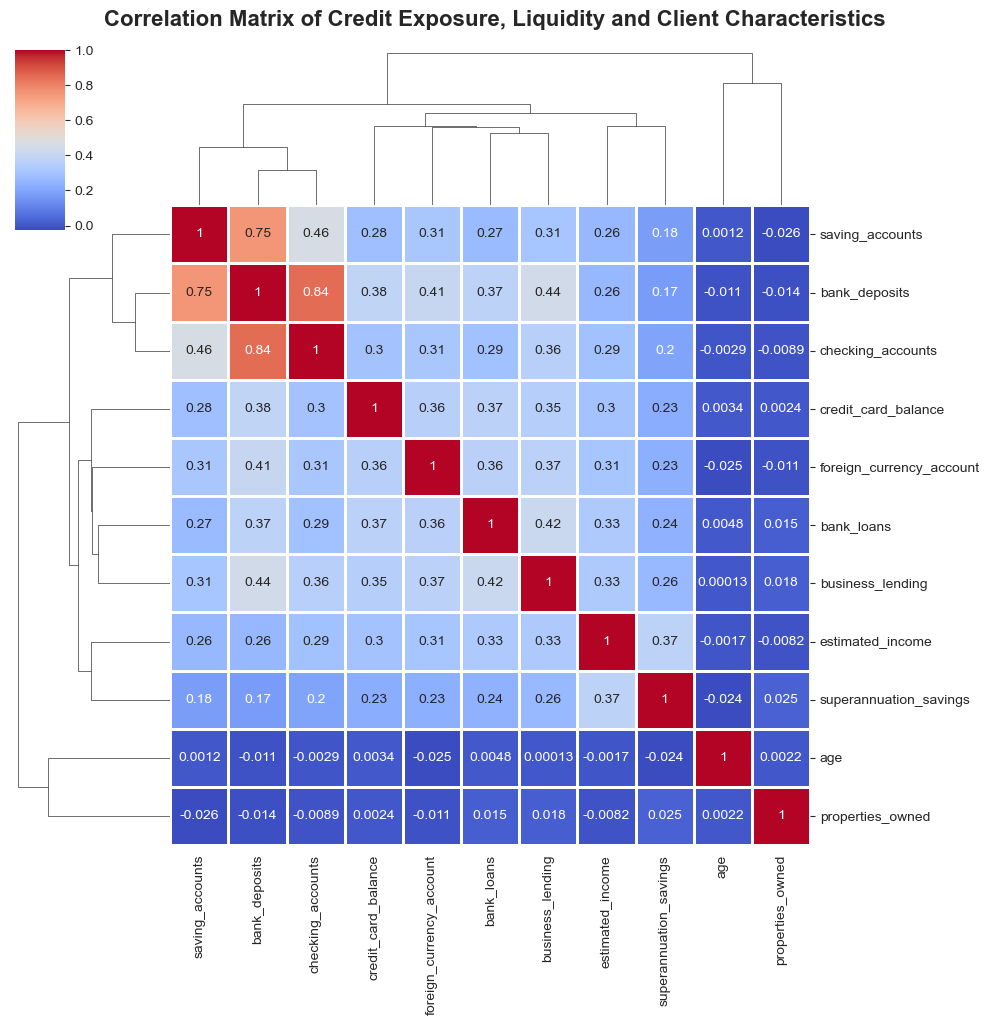

In [14]:
sns.clustermap(
    correlation_matrix, 
    cmap = 'coolwarm',
    linecolor = 'white',
    linewidths = 2, 
    annot = True
)

plt.suptitle("Correlation Matrix of Credit Exposure, Liquidity and Client Characteristics", 
             fontsize = 16, 
             fontweight = 'bold', 
             y = 1.02
            )

- <u>NOTE:

    Don't use standard_scale parameter as -ve values don't show up.

- ***Key Insights:***

    - Clear clusters:
        - Liquidity cluster: bank_deposits, checking_accounts, saving_accounts (and to a lesser extent foreign_currency_account) group tightly — they move together.
        - Credit cluster: credit_card_balance, bank_loans, business_lending form a separate cluster (moderate internal correlations).
        - Client characteristics: estimated_income and superannuation_savings cluster with each other and show links into the credit cluster; age and properties_owned are essentially orthogonal (weakly correlated) to most features.
    
    - Strong / Notable correlations:
         - Very strong: bank_deposits ↔ checking_accounts ≈ 0.84,
         - No meaningful negatives: the largest negative correlations are near -0.02 effectively negligible.

    - Risk takeaways:
        - Customers with both credit and liquidity (deposits/checking/savings) are lower risk — liquidity appears to back credit use.
            - Which data shows that:
            - bank_deposits ↔ business_lending = 0.44
            - bank_deposits ↔ credit_card_balance = 0.38
            - bank_deposits ↔ bank_loans = 0.37
            - checking_accounts ↔ business_lending = 0.36
        - Income & superannuation track with lending → credit often looks income-backed, not reckless.
            - Which data shows that:
            - estimated_income ↔ superannuation_savings = 0.37
            - estimated_income ↔ bank_loans = 0.33
            - estimated_income ↔ business_lending = 0.33
            - estimated_income ↔ credit_card_balance = 0.30
            - (also) superannuation_savings ↔ bank_loans ≈ 0.24
        - Business / foreign-currency clients (FX accounts ↔ business lending) form a distinct cohort — treat as a separate risk segment with tailored monitoring.
            - Which data shows that:
            - foreign_currency_account ↔ bank_deposits = 0.41
            - foreign_currency_account ↔ business_lending = 0.37
            - foreign_currency_account ↔ bank_loans = 0.36
            - credit_card_balance ↔ foreign_currency_account = 0.36
            - checking_accounts ↔ business_lending = 0.36
        - High-credit / low-liquidity cases are not common but should be flagged explicitly (they carry higher default risk).
            - All credit–liquidity correlations are positive (not negative)
            - No meaningful negative correlations (lowest ≈ −0.02), meaning high credit exposure rarely coincides with low liquidity.
        - Age & properties_owned add little predictive power here — prioritize liquidity, FX activity, and income/savings in scoring.

---
---